In [26]:
import pandas as pd
df = pd.read_csv("C:\\AI workforce\\bank-ann\\bank_additional_full_cleaned.csv")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [27]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [28]:
df.duplicated().sum()

np.int64(12)

In [29]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [30]:
df = df.drop(columns=["duration", "pdays", "previous"],inplace=True)

In [35]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Apply encoding only to object columns
for col in df.select_dtypes(include="object").columns:
    df[col] = encoder.fit_transform(df[col].astype(str))  # en

AttributeError: 'NoneType' object has no attribute 'select_dtypes'

In [ ]:
skewness = df.skew()
print("Skewness of each column:")
print(skewness)

Skewness of each column:
age               0.784560
job               0.451064
marital          -0.057107
education        -0.234981
default           1.435387
housing          -0.143923
loan              1.815877
contact           0.559570
month            -0.309949
day_of_week       0.008224
duration          3.262808
campaign          4.762044
pdays            -4.921386
previous          3.831396
poutcome         -0.877510
emp.var.rate     -0.724061
cons.price.idx   -0.230853
cons.conf.idx     0.302876
euribor3m        -0.709194
nr.employed      -1.044317
y                 2.450195
dtype: float64


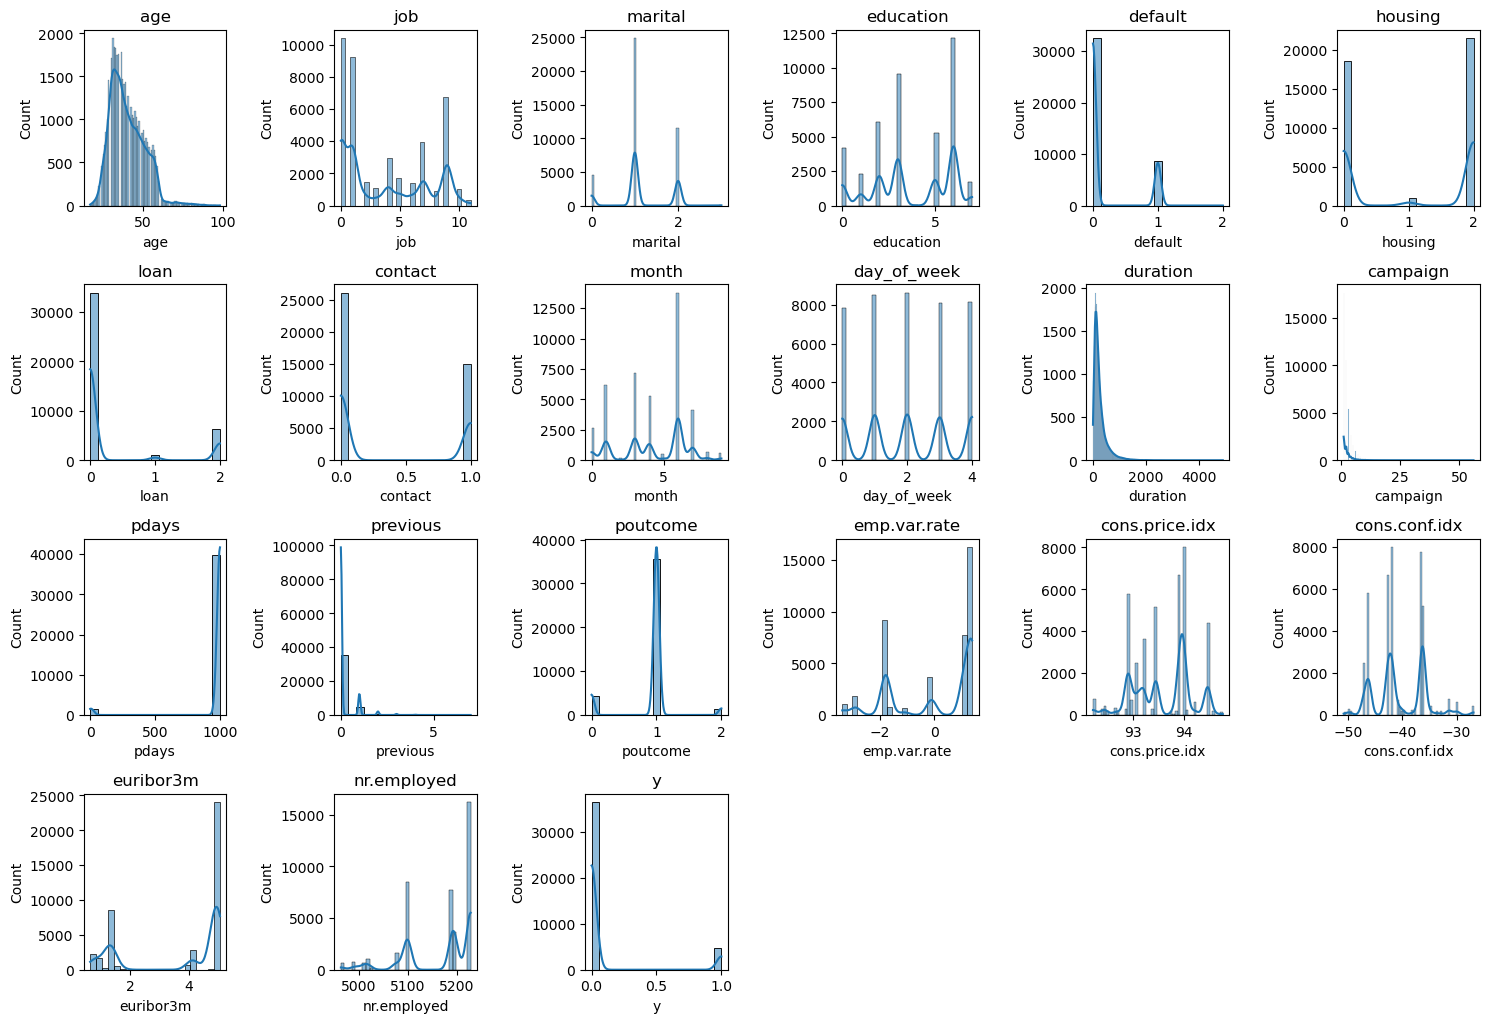

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
for i,cols in enumerate(df.columns,1):
    plt.subplot(6, 6, i)
    sns.histplot(df[cols],kde=True,fill=True)
    plt.title(cols)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
df_log = df.copy()
numeric_cols = df_log.select_dtypes(include=[np.number]).columns

df_log[numeric_cols] = df_log[numeric_cols].apply(np.log1p)

# Check skewness after transformation
print(df_log.skew(numeric_only=True))

age               0.141276
job              -0.064576
marital          -0.930502
education        -1.103766
default           1.433453
housing          -0.162748
loan              1.770387
contact           0.559570
month            -1.104940
day_of_week      -0.602152
duration         -0.421499
campaign          1.350265
pdays            -5.005207
previous          2.586511
poutcome         -1.951994
emp.var.rate     -2.021241
cons.price.idx   -0.241135
cons.conf.idx          NaN
euribor3m        -0.790738
nr.employed      -1.063718
y                 2.450195
dtype: float64


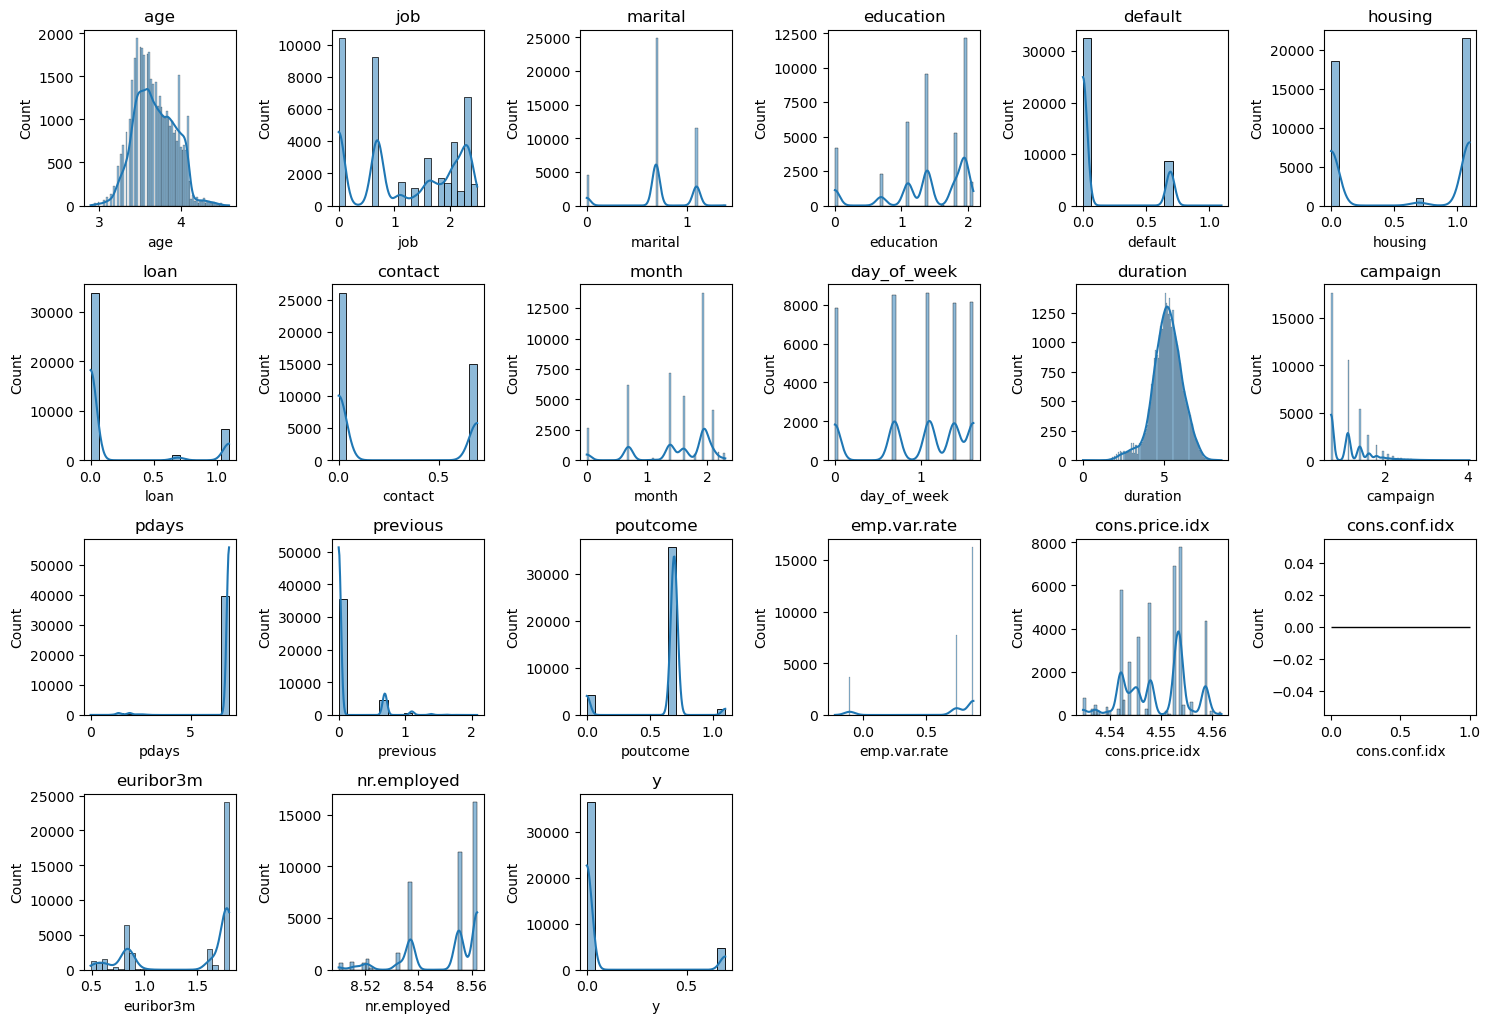

In [ ]:
plt.figure(figsize=(15,15))
for i,cols in enumerate(df.columns,1):
    plt.subplot(6, 6, i)
    sns.histplot(df_log[cols],kde=True,fill=True)
    plt.title(cols)
plt.tight_layout()
plt.show()